In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
df2 = pd.read_csv('project_split.csv')

In [3]:
df2.shape

(1107207, 191)

In [4]:
df2.isna().sum()

customer_ID         0
S_2                 0
P_2              9032
D_39                0
B_1                 0
                ...  
D_142          919148
D_143           20166
D_144            8103
D_145           20166
target              0
Length: 191, dtype: int64

In [5]:
df2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
P_2,1098175.0,0.655694,0.244578,-3.711248e-01,0.479788,0.693174,0.864019,1.010000
D_39,1107207.0,0.153758,0.270743,5.026190e-09,0.004545,0.009075,0.237227,5.362538
B_1,1107207.0,0.124324,0.212549,-7.588799e+00,0.008874,0.031475,0.127019,1.324060
B_2,1106825.0,0.621145,0.401501,2.482187e-07,0.104773,0.814310,1.002394,1.010000
R_1,1107207.0,0.078978,0.226747,2.058457e-09,0.002897,0.005786,0.008658,3.256284
...,...,...,...,...,...,...,...,...
D_142,188059.0,0.388808,0.234911,-1.422761e-02,0.199075,0.379898,0.555892,2.229368
D_143,1087041.0,0.177854,0.378132,1.060428e-08,0.003021,0.006045,0.009064,1.010000
D_144,1099104.0,0.051768,0.181365,2.500991e-09,0.002753,0.005514,0.008256,1.343331
D_145,1087041.0,0.063205,0.196999,2.811854e-09,0.003025,0.006041,0.009070,4.827630


In [6]:
missing_percent = (df2.isnull().sum() / len(df2)) * 100
missing_percent

customer_ID     0.000000
S_2             0.000000
P_2             0.815746
D_39            0.000000
B_1             0.000000
                 ...    
D_142          83.015010
D_143           1.821340
D_144           0.731841
D_145           1.821340
target          0.000000
Length: 191, dtype: float64

In [7]:
columns_to_drop = missing_percent[missing_percent > 95].index

In [8]:
df2.drop(columns=columns_to_drop, inplace=True)

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1107207 entries, 0 to 1107206
Columns: 178 entries, customer_ID to target
dtypes: float64(172), int64(2), object(4)
memory usage: 1.5+ GB


In [10]:
# check data types - objects imply non-numeric
# note that sometimes numeric columns appear as Object, because of few non-numeric observations. Such as a character that may represent a special value.
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    print(df2.dtypes)

customer_ID     object
S_2             object
P_2            float64
D_39           float64
B_1            float64
B_2            float64
R_1            float64
S_3            float64
D_41           float64
B_3            float64
D_42           float64
D_43           float64
D_44           float64
B_4            float64
D_45           float64
B_5            float64
R_2            float64
D_46           float64
D_47           float64
D_48           float64
D_49           float64
B_6            float64
B_7            float64
B_8            float64
D_50           float64
D_51           float64
B_9            float64
R_3            float64
D_52           float64
P_3            float64
B_10           float64
D_53           float64
S_5            float64
B_11           float64
S_6            float64
D_54           float64
R_4            float64
S_7            float64
B_12           float64
S_8            float64
D_55           float64
D_56           float64
B_13           float64
R_5        

In [11]:
df2.head(5)

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_133,R_28,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
0,0000d17a1447b25a01e42e1ac56b091bb7cbb06317be4c...,2017-03-25,1.002492,0.508611,0.040674,0.267885,0.004895,0.112576,0.004467,0.040376,...,0.002550,0.003143,0.000520,0.007173,0.009178,NaN,0.006105,0.008034,0.001871,0
1,0000d17a1447b25a01e42e1ac56b091bb7cbb06317be4c...,2017-04-23,1.007906,0.477011,0.032132,0.175237,0.001701,0.117676,0.006339,0.070690,...,0.005173,0.006777,0.005870,0.005655,0.005218,NaN,0.008527,0.007652,0.008693,0
2,0000d17a1447b25a01e42e1ac56b091bb7cbb06317be4c...,2017-05-23,1.001680,0.450506,0.031994,0.226394,0.008610,0.126923,0.009457,0.098883,...,0.004761,0.005696,0.008820,0.007346,0.000346,NaN,0.008486,0.009453,0.001174,0
3,0000d17a1447b25a01e42e1ac56b091bb7cbb06317be4c...,2017-06-02,1.009520,0.004791,0.030036,0.222870,0.008314,0.094183,0.000760,0.094090,...,0.001502,0.009179,0.008724,0.005192,0.004731,NaN,0.008833,0.006623,0.006367,0
4,0000d17a1447b25a01e42e1ac56b091bb7cbb06317be4c...,2017-07-23,1.009547,0.475328,0.029422,0.186930,0.007815,0.073078,0.000143,0.086715,...,0.007962,0.006599,0.009444,0.000397,0.007929,NaN,0.006650,0.008722,0.004313,0


In [12]:
columns_to_encode = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']

# Perform one-hot encoding
df = pd.get_dummies(df2, columns=columns_to_encode)


In [13]:
df.head(5)

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_64_U,D_66_0.0,D_66_1.0,D_68_0.0,D_68_1.0,D_68_2.0,D_68_3.0,D_68_4.0,D_68_5.0,D_68_6.0
0,0000d17a1447b25a01e42e1ac56b091bb7cbb06317be4c...,2017-03-25,1.002492,0.508611,0.040674,0.267885,0.004895,0.112576,0.004467,0.040376,...,0,0,0,0,0,0,0,0,1,0
1,0000d17a1447b25a01e42e1ac56b091bb7cbb06317be4c...,2017-04-23,1.007906,0.477011,0.032132,0.175237,0.001701,0.117676,0.006339,0.070690,...,0,0,0,0,0,0,0,0,1,0
2,0000d17a1447b25a01e42e1ac56b091bb7cbb06317be4c...,2017-05-23,1.001680,0.450506,0.031994,0.226394,0.008610,0.126923,0.009457,0.098883,...,0,0,0,0,0,0,0,0,1,0
3,0000d17a1447b25a01e42e1ac56b091bb7cbb06317be4c...,2017-06-02,1.009520,0.004791,0.030036,0.222870,0.008314,0.094183,0.000760,0.094090,...,0,0,0,0,0,0,0,0,1,0
4,0000d17a1447b25a01e42e1ac56b091bb7cbb06317be4c...,2017-07-23,1.009547,0.475328,0.029422,0.186930,0.007815,0.073078,0.000143,0.086715,...,0,0,0,0,0,0,0,0,1,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1107207 entries, 0 to 1107206
Columns: 212 entries, customer_ID to D_68_6.0
dtypes: float64(163), int64(2), object(2), uint8(45)
memory usage: 1.4+ GB


In [15]:
df

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_64_U,D_66_0.0,D_66_1.0,D_68_0.0,D_68_1.0,D_68_2.0,D_68_3.0,D_68_4.0,D_68_5.0,D_68_6.0
0,0000d17a1447b25a01e42e1ac56b091bb7cbb06317be4c...,2017-03-25,1.002492,0.508611,0.040674,0.267885,0.004895,0.112576,0.004467,0.040376,...,0,0,0,0,0,0,0,0,1,0
1,0000d17a1447b25a01e42e1ac56b091bb7cbb06317be4c...,2017-04-23,1.007906,0.477011,0.032132,0.175237,0.001701,0.117676,0.006339,0.070690,...,0,0,0,0,0,0,0,0,1,0
2,0000d17a1447b25a01e42e1ac56b091bb7cbb06317be4c...,2017-05-23,1.001680,0.450506,0.031994,0.226394,0.008610,0.126923,0.009457,0.098883,...,0,0,0,0,0,0,0,0,1,0
3,0000d17a1447b25a01e42e1ac56b091bb7cbb06317be4c...,2017-06-02,1.009520,0.004791,0.030036,0.222870,0.008314,0.094183,0.000760,0.094090,...,0,0,0,0,0,0,0,0,1,0
4,0000d17a1447b25a01e42e1ac56b091bb7cbb06317be4c...,2017-07-23,1.009547,0.475328,0.029422,0.186930,0.007815,0.073078,0.000143,0.086715,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1107202,ffff9984b999fccb2b6127635ed0736dda94e544e67e02...,2017-11-02,0.793587,0.121256,0.014251,1.005420,0.008506,0.088133,0.001796,0.001480,...,1,0,0,0,0,0,0,0,1,0
1107203,ffff9984b999fccb2b6127635ed0736dda94e544e67e02...,2017-12-14,0.795304,0.475011,0.012998,1.005270,0.000870,0.079066,0.009637,0.008872,...,1,0,0,0,0,0,0,0,1,0
1107204,ffff9984b999fccb2b6127635ed0736dda94e544e67e02...,2018-01-11,0.794548,0.384731,0.027101,1.001420,0.005396,0.075824,0.000377,0.004891,...,1,0,0,0,0,0,0,0,1,0
1107205,ffff9984b999fccb2b6127635ed0736dda94e544e67e02...,2018-02-06,0.786806,0.236684,0.016190,1.001367,0.008386,0.070241,0.000588,0.000675,...,1,0,0,0,0,0,0,0,1,0


In [16]:
# check data types - objects imply non-numeric
# note that sometimes numeric columns appear as Object, because of few non-numeric observations. Such as a character that may represent a special value.
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    print(df.dtypes)

customer_ID     object
S_2             object
P_2            float64
D_39           float64
B_1            float64
B_2            float64
R_1            float64
S_3            float64
D_41           float64
B_3            float64
D_42           float64
D_43           float64
D_44           float64
B_4            float64
D_45           float64
B_5            float64
R_2            float64
D_46           float64
D_47           float64
D_48           float64
D_49           float64
B_6            float64
B_7            float64
B_8            float64
D_50           float64
D_51           float64
B_9            float64
R_3            float64
D_52           float64
P_3            float64
B_10           float64
D_53           float64
S_5            float64
B_11           float64
S_6            float64
D_54           float64
R_4            float64
S_7            float64
B_12           float64
S_8            float64
D_55           float64
D_56           float64
B_13           float64
R_5        

In [17]:
numeric_columns = df.select_dtypes(include=np.float64).columns.tolist()
average_data = df.groupby('customer_ID')[numeric_columns].mean()
average_data 

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,...,D_132,D_133,R_28,D_139,D_140,D_141,D_142,D_143,D_144,D_145
customer_ID,,,,,,,,,,,,,,,,,,,,,
0000d17a1447b25a01e42e1ac56b091bb7cbb06317be4cb59b50fec59e0b6381,1.005816,0.353440,0.062956,0.233906,0.005676,0.104515,0.002809,0.132391,NaN,0.015880,...,NaN,0.004680,0.006162,0.004989,0.005193,0.004620,NaN,0.005686,0.005935,0.005734
0000f99513770170a1aba690daeeb8a96da4a39f11fc27da5c30a79db61c1e85,0.406705,0.124733,0.938564,0.025402,0.006254,0.159538,0.005921,1.169219,NaN,0.046456,...,NaN,0.004542,0.005481,1.003648,0.003951,0.870727,0.163845,1.002933,0.005054,0.739022
00013181a0c5fc8f1ea38cd2b90fe8ad2fa8cad9d9f13e4063bdf6b0f7d51eb6,0.447386,0.006518,0.016996,0.816127,0.157313,0.196397,0.006172,0.005620,NaN,0.154056,...,NaN,0.005156,0.004970,0.005648,0.004904,0.003842,NaN,0.003758,0.005898,0.005552
0002e335892f7998f0feb3a59f32d652f0da7c85e535b99ea6f87fd317ed47f4,0.578436,0.340231,0.124824,0.689964,0.042482,0.147633,0.118095,0.004651,NaN,NaN,...,NaN,0.003462,0.004089,0.004559,0.004697,0.004856,NaN,0.003595,0.004329,0.005240
0003b7891c49786441d138c01f55f1712df645989dcd2a83106ab4a229fee72d,0.947334,0.150307,0.038504,0.695515,0.005094,0.384485,0.004443,0.033759,NaN,0.132122,...,0.234004,0.564444,0.003344,0.004950,0.004052,0.004836,NaN,0.004090,0.004734,0.003945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffc9005dae01b2c79a168c6562144220657b28b8f1bf4e3bac62695d76e2afa,0.746232,0.004974,0.004776,0.814110,0.005393,NaN,0.006014,0.005955,NaN,NaN,...,NaN,0.005724,0.006182,0.005650,0.003715,0.005810,NaN,0.005877,0.005936,0.004576
fffd4c8532e6746a53dfdd52de2219c847ddb0123c27ccb64cefd5291be2ed35,0.341202,0.183661,1.070339,0.411638,0.379537,0.663744,0.006227,0.390088,NaN,0.029902,...,NaN,0.008950,0.001926,0.502749,0.004758,0.482077,0.440197,0.502747,0.452579,0.095677
fffe39594fad367d9eb8ae18537b56b0739c4cc3ab9810f8642d49ec45e60c62,0.253711,0.083754,0.222351,0.034876,0.408507,0.288824,0.003431,0.499312,NaN,0.247414,...,0.011441,0.005794,0.005045,0.005001,0.004269,0.006253,NaN,0.006704,0.005695,0.004850


In [18]:
int_columns = df.select_dtypes(include=np.int64).columns.tolist()
average_int_data = df.groupby('customer_ID')[int_columns].mean()
average_int_data.head()
#agg(['mean','median','std']).plot.bar()

,B_31,target
customer_ID,,
0000d17a1447b25a01e42e1ac56b091bb7cbb06317be4cb59b50fec59e0b6381,1.0,0.0
0000f99513770170a1aba690daeeb8a96da4a39f11fc27da5c30a79db61c1e85,1.0,1.0
00013181a0c5fc8f1ea38cd2b90fe8ad2fa8cad9d9f13e4063bdf6b0f7d51eb6,1.0,1.0
0002e335892f7998f0feb3a59f32d652f0da7c85e535b99ea6f87fd317ed47f4,1.0,1.0
0003b7891c49786441d138c01f55f1712df645989dcd2a83106ab4a229fee72d,1.0,0.0


In [19]:
binary_columns = df.select_dtypes(include=np.uint8).columns.tolist()
average_binary_data = df.groupby('customer_ID')[binary_columns].mean()
average_binary_data

,B_30_0.0,B_30_1.0,B_30_2.0,B_38_1.0,B_38_2.0,B_38_3.0,B_38_4.0,B_38_5.0,B_38_6.0,B_38_7.0,...,D_64_U,D_66_0.0,D_66_1.0,D_68_0.0,D_68_1.0,D_68_2.0,D_68_3.0,D_68_4.0,D_68_5.0,D_68_6.0
customer_ID,,,,,,,,,,,,,,,,,,,,,
0000d17a1447b25a01e42e1ac56b091bb7cbb06317be4cb59b50fec59e0b6381,1.0,0.0,0.0,0.000000,0.000000,0.769231,0.0,0.230769,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,1.000000,0.000000
0000f99513770170a1aba690daeeb8a96da4a39f11fc27da5c30a79db61c1e85,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.153846,0.076923,0.769231,...,1.000000,0.0,1.0,0.0,0.000000,0.000000,0.153846,0.0,0.000000,0.846154
00013181a0c5fc8f1ea38cd2b90fe8ad2fa8cad9d9f13e4063bdf6b0f7d51eb6,1.0,0.0,0.0,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,1.000000,0.000000
0002e335892f7998f0feb3a59f32d652f0da7c85e535b99ea6f87fd317ed47f4,1.0,0.0,0.0,0.384615,0.615385,0.000000,0.0,0.000000,0.000000,0.000000,...,0.769231,0.0,0.0,0.0,0.538462,0.461538,0.000000,0.0,0.000000,0.000000
0003b7891c49786441d138c01f55f1712df645989dcd2a83106ab4a229fee72d,1.0,0.0,0.0,0.000000,0.153846,0.846154,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffc9005dae01b2c79a168c6562144220657b28b8f1bf4e3bac62695d76e2afa,1.0,0.0,0.0,0.923077,0.076923,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.153846,0.846154
fffd4c8532e6746a53dfdd52de2219c847ddb0123c27ccb64cefd5291be2ed35,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,...,0.500000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.500000
fffe39594fad367d9eb8ae18537b56b0739c4cc3ab9810f8642d49ec45e60c62,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.846154,0.153846,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,1.000000


In [20]:
merged_data = pd.merge(average_binary_data, average_int_data, on='customer_ID')

# Join merged_data with average_data on a common column (e.g., customer_ID)
data = pd.merge(merged_data, average_data, on='customer_ID')
#data = average_data.join(grouped_data)
data.head()

,B_30_0.0,B_30_1.0,B_30_2.0,B_38_1.0,B_38_2.0,B_38_3.0,B_38_4.0,B_38_5.0,B_38_6.0,B_38_7.0,...,D_132,D_133,R_28,D_139,D_140,D_141,D_142,D_143,D_144,D_145
customer_ID,,,,,,,,,,,,,,,,,,,,,
0000d17a1447b25a01e42e1ac56b091bb7cbb06317be4cb59b50fec59e0b6381,1.0,0.0,0.0,0.000000,0.000000,0.769231,0.0,0.230769,0.000000,0.000000,...,NaN,0.004680,0.006162,0.004989,0.005193,0.004620,NaN,0.005686,0.005935,0.005734
0000f99513770170a1aba690daeeb8a96da4a39f11fc27da5c30a79db61c1e85,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.153846,0.076923,0.769231,...,NaN,0.004542,0.005481,1.003648,0.003951,0.870727,0.163845,1.002933,0.005054,0.739022
00013181a0c5fc8f1ea38cd2b90fe8ad2fa8cad9d9f13e4063bdf6b0f7d51eb6,1.0,0.0,0.0,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,NaN,0.005156,0.004970,0.005648,0.004904,0.003842,NaN,0.003758,0.005898,0.005552
0002e335892f7998f0feb3a59f32d652f0da7c85e535b99ea6f87fd317ed47f4,1.0,0.0,0.0,0.384615,0.615385,0.000000,0.0,0.000000,0.000000,0.000000,...,NaN,0.003462,0.004089,0.004559,0.004697,0.004856,NaN,0.003595,0.004329,0.005240
0003b7891c49786441d138c01f55f1712df645989dcd2a83106ab4a229fee72d,1.0,0.0,0.0,0.000000,0.153846,0.846154,0.0,0.000000,0.000000,0.000000,...,0.234004,0.564444,0.003344,0.004950,0.004052,0.004836,NaN,0.004090,0.004734,0.003945


In [21]:
duplicate_count = data.duplicated().sum()
duplicate_count

0

In [22]:

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    print(data.dtypes)

B_30_0.0      float64
B_30_1.0      float64
B_30_2.0      float64
B_38_1.0      float64
B_38_2.0      float64
B_38_3.0      float64
B_38_4.0      float64
B_38_5.0      float64
B_38_6.0      float64
B_38_7.0      float64
D_114_0.0     float64
D_114_1.0     float64
D_116_0.0     float64
D_116_1.0     float64
D_117_-1.0    float64
D_117_1.0     float64
D_117_2.0     float64
D_117_3.0     float64
D_117_4.0     float64
D_117_5.0     float64
D_117_6.0     float64
D_120_0.0     float64
D_120_1.0     float64
D_126_-1.0    float64
D_126_0.0     float64
D_126_1.0     float64
D_63_CL       float64
D_63_CO       float64
D_63_CR       float64
D_63_XL       float64
D_63_XM       float64
D_63_XZ       float64
D_64_-1       float64
D_64_O        float64
D_64_R        float64
D_64_U        float64
D_66_0.0      float64
D_66_1.0      float64
D_68_0.0      float64
D_68_1.0      float64
D_68_2.0      float64
D_68_3.0      float64
D_68_4.0      float64
D_68_5.0      float64
D_68_6.0      float64
B_31      

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91782 entries, 0000d17a1447b25a01e42e1ac56b091bb7cbb06317be4cb59b50fec59e0b6381 to ffff9984b999fccb2b6127635ed0736dda94e544e67e026eee4d20f680639ff6
Columns: 210 entries, B_30_0.0 to D_145
dtypes: float64(210)
memory usage: 147.8+ MB


In [24]:
X_train,X_test1, Y_train, Y_test1 = train_test_split(data.drop('target', axis=1), data['target'], test_size=0.3, random_state=42)
X_test1, X_test2, Y_test1, Y_test2 = train_test_split(X_test1,Y_test1, test_size=0.5, random_state=42)


In [25]:
X_train.replace([-999, -999.0, 'NA'], float('nan'), inplace=True)
X_test1.replace([-999, -999.0, 'NA'], float('nan'), inplace=True)
X_test2.replace([-999, -999.0, 'NA'], float('nan'), inplace=True)

In [26]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [27]:
import xgboost as xgb

In [28]:
xgb_instance = xgb.XGBClassifier()

In [29]:
xgb_instance = xgb.XGBClassifier() # nothing inside paranthesis, meaning we are using default parameters, with 100 trees.

model_for_feature_selection = xgb_instance.fit(X_train,Y_train)
model_for_feature_selection

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [30]:

feature_importance = {'Feature':X_train.columns,'Importance':model_for_feature_selection.feature_importances_}
feature_importance = pd.DataFrame(feature_importance)
feature_importance.sort_values("Importance", inplace=True,ascending=False)
feature_importance

,Feature,Importance
46,P_2,0.224714
48,B_1,0.049073
50,R_1,0.047211
108,B_22,0.028665
66,B_7,0.015624
...,...,...
30,D_63_XM,0.000000
31,D_63_XZ,0.000000
32,D_64_-1,0.000000
29,D_63_XL,0.000000


In [31]:
# choose featires with FI higher than 0.5%
final_features = feature_importance["Feature"][feature_importance.Importance > 0.005]

X1_train = X_train[final_features]
X1_test1 = X_test1[final_features]
X1_test2 = X_test2[final_features]
final_features

46          P_2
48          B_1
50          R_1
108        B_22
66          B_7
1      B_30_1.0
54         D_42
97         D_65
51          S_3
77         B_11
56         D_44
71          R_3
73          P_3
60          R_2
6      B_38_4.0
49          B_2
37     D_66_1.0
61         D_46
58         D_45
99         B_17
55         D_43
47         D_39
64         D_49
68         D_50
70          B_9
85         D_56
57          B_4
Name: Feature, dtype: object

In [32]:
model = xgb.XGBClassifier(n_estimators=300, learning_rate=0.5, max_depth=4, subsample=0.5, colsample_bytree=0.5, scale_pos_weight=5)
model.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [33]:
##feature_importance = model.feature_importances_

s_feature_importance = {'Feature':X_train.columns,'Importance':model.feature_importances_}
s_feature_importance = pd.DataFrame(s_feature_importance)
s_feature_importance.sort_values("Importance", inplace=True,ascending=False)
s_feature_importance

,Feature,Importance
63,D_48,0.116095
177,B_37,0.063901
46,P_2,0.049785
50,R_1,0.022107
70,B_9,0.021629
...,...,...
27,D_63_CO,0.000000
30,D_63_XM,0.000000
38,D_68_0.0,0.000000
13,D_116_1.0,0.000000


In [34]:
#feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
# choose features with FI higher than 0.5%

final_features_1 = s_feature_importance["Feature"][s_feature_importance.Importance > 0.005]

X2_train = X_train[final_features_1]
X2_test1 = X_test1[final_features_1]
X2_test2 = X_test2[final_features_1]
final_features_1


63          D_48
177         B_37
46           P_2
50           R_1
70           B_9
54          D_42
96          D_62
51           S_3
108         B_22
66           B_7
97          D_65
71           R_3
199        D_132
69          D_51
25     D_126_1.0
99          B_17
37      D_66_1.0
83           S_8
28       D_63_CR
59           B_5
79          D_54
61          D_46
166         S_23
68          D_50
Name: Feature, dtype: object

In [35]:
merged_feature_importance = pd.concat([feature_importance, s_feature_importance], ignore_index=True)

# Group by 'Feature' and calculate the maximum importance across both models
max_importance = merged_feature_importance.groupby('Feature')['Importance'].max().reset_index()

# Filter features that have importance greater than 0.5% in either of the two models
filtered_features = max_importance[max_importance['Importance'] > 0.005]['Feature']

X3_train = X_train[filtered_features]
X3_test1 = X_test1[filtered_features]
X3_test2 = X_test2[filtered_features]


In [36]:
filtered_features.to_csv('filtered_features.csv', index=False)

In [37]:
filtered_features

0            B_1
2           B_11
8           B_17
11           B_2
14          B_22
24      B_30_1.0
30          B_37
34      B_38_4.0
38           B_4
41           B_5
43           B_7
45           B_9
78     D_126_1.0
84         D_132
93          D_39
95          D_42
96          D_43
97          D_44
98          D_45
99          D_46
101         D_48
102         D_49
103         D_50
104         D_51
107         D_54
109         D_56
114         D_62
117      D_63_CR
125         D_65
127     D_66_1.0
157          P_2
158          P_3
160          R_1
171          R_2
181          R_3
198         S_23
203          S_3
207          S_8
Name: Feature, dtype: object

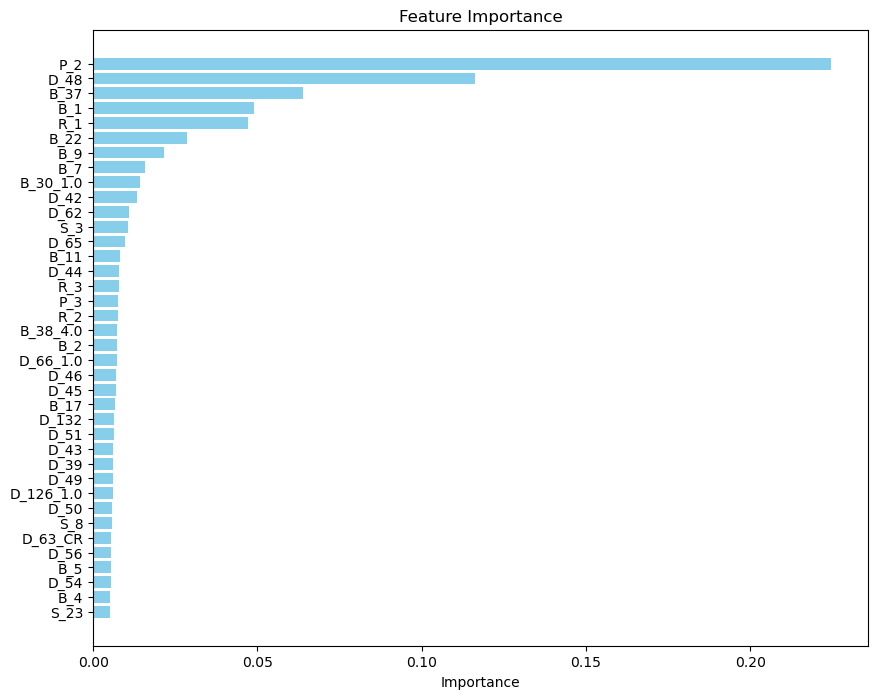

In [38]:
import matplotlib.pyplot as plt


filtered_max_importance = max_importance[max_importance['Feature'].isin(filtered_features)]


filtered_max_importance = filtered_max_importance.sort_values(by='Importance', ascending=True)

plt.figure(figsize=(10, 8))
plt.barh(filtered_max_importance['Feature'], filtered_max_importance['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()


In [39]:


from sklearn.metrics import roc_auc_score
table = pd.DataFrame(columns = ["Num Trees", "Learning Rate","subsample","colsample_bytree","scale_pos_weight", "AUC Train", "AUC Test1","AUC Test2"])

row = 0
for num_trees in [50, 100, 300]:
  for LR in [0.01, 0.1]:
    for subsample in [0.5,0.8]:
        for colsample_bytree in [0.5,1.0]:
            for scale_pos_weight in [1,5,10]:
               xgb_instance = xgb.XGBClassifier(n_estimators=num_trees, learning_rate = LR,subsample=subsample,colsample_bytree=colsample_bytree,scale_pos_weight=scale_pos_weight)
               model = xgb_instance.fit(X3_train, Y_train)

               table.loc[row,"Num Trees"] = num_trees
               table.loc[row,"Learning Rate"] = LR
               table.loc[row,"subsample"] = subsample
               table.loc[row,"colsample_bytree"] = colsample_bytree
               table.loc[row,"scale_pos_weight"] = scale_pos_weight
               table.loc[row,"AUC Train"] = roc_auc_score(Y_train, model.predict_proba(X3_train)[:,1])
               table.loc[row,"AUC Test1"] = roc_auc_score(Y_test1, model.predict_proba(X3_test1)[:,1])
               table.loc[row,"AUC Test2"] = roc_auc_score(Y_test2, model.predict_proba(X3_test2)[:,1])



               row = row + 1

table

,Num Trees,Learning Rate,subsample,colsample_bytree,scale_pos_weight,AUC Train,AUC Test1,AUC Test2
0,50,0.01,0.5,0.5,1,0.947932,0.940063,0.941742
1,50,0.01,0.5,0.5,5,0.945585,0.937517,0.939524
2,50,0.01,0.5,0.5,10,0.943755,0.935746,0.937838
3,50,0.01,0.5,1.0,1,0.945849,0.937243,0.938184
4,50,0.01,0.5,1.0,5,0.942322,0.93375,0.934771
...,...,...,...,...,...,...,...,...
67,300,0.1,0.8,0.5,5,0.984902,0.945822,0.948499
68,300,0.1,0.8,0.5,10,0.983856,0.94569,0.947603
69,300,0.1,0.8,1.0,1,0.987905,0.946272,0.948321
70,300,0.1,0.8,1.0,5,0.987276,0.946245,0.947758


In [40]:
# Define the thresholds
train_threshold = 0.85
difference_threshold = 0.05

# Initialize the best_auc as 0
best_auc = 0
# Initialize the best model as None
best_model = None

# Loop through each row in the dataframe
for index, row in table.iterrows():
    # Calculate the maximum difference between train AUC and test AUCs
    max_difference = max(abs(row['AUC Train'] - row['AUC Test1']), abs(row['AUC Train'] - row['AUC Test2']))
    
    # Check if the model has low bias (AUC Train > train_threshold) and low variance (max_difference < difference_threshold)
    if row['AUC Train'] > train_threshold and max_difference < difference_threshold:
        # Check if this model has a higher average AUC score on the test sets than the current best model
        average_test_auc = (row['AUC Test1'] + row['AUC Test2']) / 2
        if average_test_auc > best_auc:
            # Update the best_auc and best_model
            best_auc = average_test_auc
            best_model = row

# Print the parameters of the best model
if best_model is not None:
    print(best_model)
else:
    print("No model found that satisfies the given conditions.")


Num Trees                100
Learning Rate            0.1
subsample                0.8
colsample_bytree         0.5
scale_pos_weight           1
AUC Train           0.968106
AUC Test1           0.947367
AUC Test2           0.948721
Name: 42, dtype: object


In [41]:
best_xgb = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, subsample=0.8, colsample_bytree=1.0, scale_pos_weight=1)

# Fit the model on the training data
best_model = best_xgb.fit(X3_train, Y_train)


In [42]:
best_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [43]:
Y_train

customer_ID
e306cdd205f608d84abe272c3ab59aa14e1a9dd87b39c360b60838026cf573f2    0.0
072813bb44b3567d6b564208f2981e9da5aa3fb1e244f68953e000387c4374de    1.0
a6d564d25f7a8e586a0a2c6f7ead434589e52f4843234cf4763841217903812b    0.0
7ad91c914a83159cc8b605744e9e4180d0f8d449d49ebfe9aa8681e7be568593    0.0
c273d0a88bc0e693f8d09e1997beaabae3300df509ad450ee1d9dedefe50cfbf    0.0
                                                                   ... 
11ba9b66e914d8d75cf523fe251838adf4d1315f4d9af89334b0e23da2aeadac    0.0
99107cc3cb919abff3197e831307d67f3e945a27d37197dea4a6e4835aa3d1ff    0.0
d63250022e3bf5fdcbdee5e0c3d4347e63ac4324faa6313e132dbccc6fa1acc7    0.0
028022cec0be84352f9780b597310c244293f38d7d85a0c70ba036d1881dc7d7    0.0
2c2fff2d000a8734b445fd9459b17a19da5d3c4ab454ac6166f04f07178223b3    0.0
Name: target, Length: 64247, dtype: float64

In [44]:
# Rank Ordering
perf_train_data = pd.DataFrame({"Actual": Y_train, "Prediction": best_model.predict_proba(X3_train)[:,1]})
quantiles = list(set(perf_train_data.Prediction.quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])))
quantiles.sort()
quantiles.insert(0,0)
quantiles.insert(len(quantiles),1)

perf_train_data["Score Bins"] = pd.cut(perf_train_data["Prediction"], quantiles)
stat = perf_train_data.groupby("Score Bins")["Actual"].agg(["sum", "count"])
stat["Bad Rate"] = stat["sum"] / stat["count"]
stat

,sum,count,Bad Rate
Score Bins,,,
"(0.0, 0.00166]",1.0,6425,0.000156
"(0.00166, 0.00271]",1.0,6425,0.000156
"(0.00271, 0.00476]",4.0,6424,0.000623
"(0.00476, 0.0105]",16.0,6425,0.002490
"(0.0105, 0.0334]",60.0,6425,0.009339
"(0.0334, 0.13]",271.0,6424,0.042186
"(0.13, 0.379]",1237.0,6425,0.192529
"(0.379, 0.663]",3402.0,6424,0.529577
"(0.663, 0.869]",5331.0,6425,0.829728


In [45]:
stat = stat.reset_index()


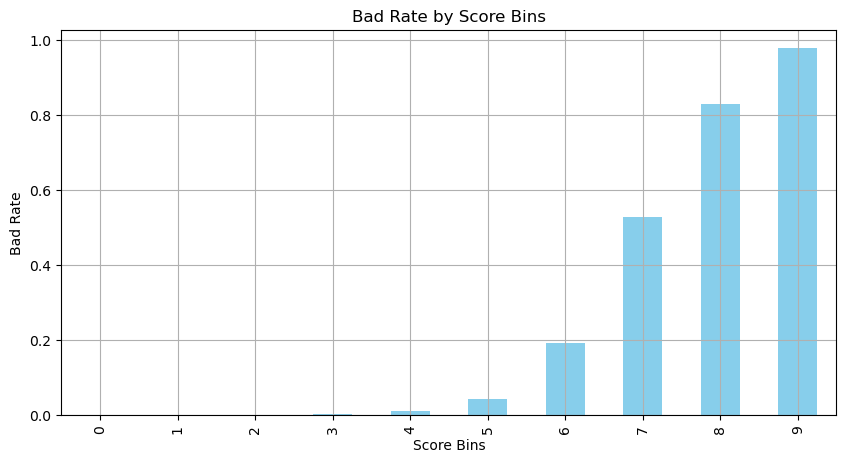

In [46]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 5))
stat['Bad Rate'].plot(kind='bar', color='skyblue')
plt.xlabel('Score Bins')
plt.ylabel('Bad Rate')
plt.title('Bad Rate by Score Bins')
plt.grid(True)
plt.show()


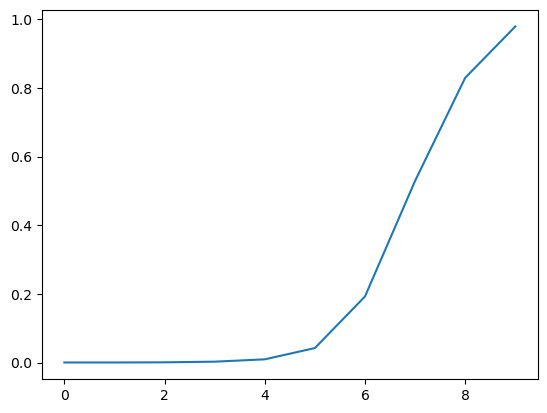

In [47]:
import matplotlib.pyplot as plt

plt.plot(stat["Bad Rate"])

In [48]:
perf_test_data = pd.DataFrame({"Actual": Y_test1, "Prediction": best_model.predict_proba(X3_test1)[:,1]})

perf_test_data["Score Bins"] = pd.cut(perf_test_data["Prediction"], quantiles)
stat1 = perf_test_data.groupby("Score Bins")["Actual"].agg(["sum", "count"])
stat1["Bad Rate"] = stat1["sum"] / stat1["count"]
stat1

,sum,count,Bad Rate
Score Bins,,,
"(0.0, 0.00166]",0.0,1383,0.000000
"(0.00166, 0.00271]",1.0,1398,0.000715
"(0.00271, 0.00476]",2.0,1334,0.001499
"(0.00476, 0.0105]",13.0,1375,0.009455
"(0.0105, 0.0334]",36.0,1394,0.025825
"(0.0334, 0.13]",115.0,1314,0.087519
"(0.13, 0.379]",368.0,1378,0.267054
"(0.379, 0.663]",775.0,1485,0.521886
"(0.663, 0.869]",1052.0,1386,0.759019


In [49]:
stat1 = stat1.reset_index()

In [50]:
perf_test_data = pd.DataFrame({"Actual": Y_test2, "Prediction": best_model.predict_proba(X3_test2)[:,1]})

perf_test_data["Score Bins"] = pd.cut(perf_test_data["Prediction"], quantiles)
stat2 = perf_test_data.groupby("Score Bins")["Actual"].agg(["sum", "count"])
stat2["Bad Rate"] = stat2["sum"] / stat2["count"]
stat2

,sum,count,Bad Rate
Score Bins,,,
"(0.0, 0.00166]",2.0,1376,0.001453
"(0.00166, 0.00271]",3.0,1341,0.002237
"(0.00271, 0.00476]",0.0,1420,0.000000
"(0.00476, 0.0105]",16.0,1373,0.011653
"(0.0105, 0.0334]",25.0,1356,0.018437
"(0.0334, 0.13]",101.0,1349,0.074870
"(0.13, 0.379]",349.0,1483,0.235334
"(0.379, 0.663]",749.0,1401,0.534618
"(0.663, 0.869]",1025.0,1360,0.753676


In [51]:
stat2 = stat2.reset_index()

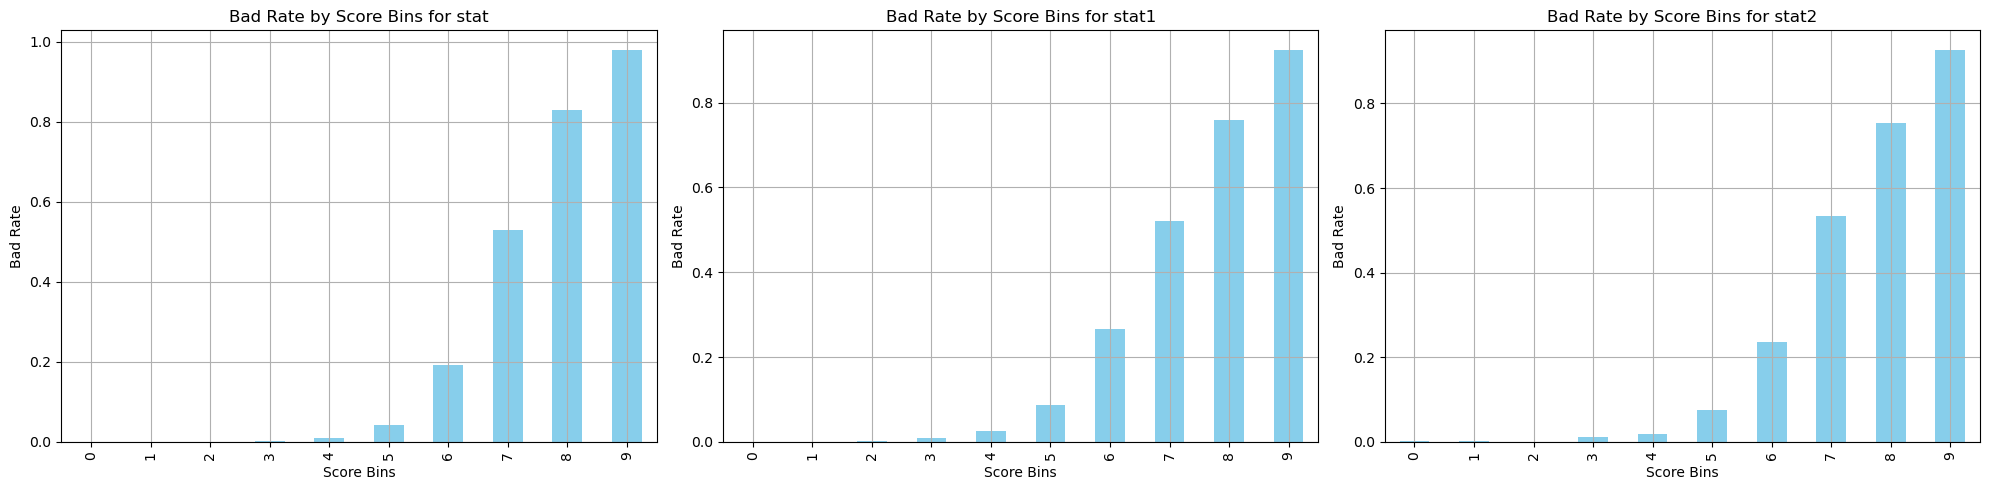

In [52]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))  # Create 3 subplots in a row

stat['Bad Rate'].plot(kind='bar', color='skyblue', ax=ax[0])
ax[0].set_title('Bad Rate by Score Bins for stat')
ax[0].set_xlabel('Score Bins')
ax[0].set_ylabel('Bad Rate')
ax[0].grid(True)

stat1['Bad Rate'].plot(kind='bar', color='skyblue', ax=ax[1])
ax[1].set_title('Bad Rate by Score Bins for stat1')
ax[1].set_xlabel('Score Bins')
ax[1].set_ylabel('Bad Rate')
ax[1].grid(True)

stat2['Bad Rate'].plot(kind='bar', color='skyblue', ax=ax[2])
ax[2].set_title('Bad Rate by Score Bins for stat2')
ax[2].set_xlabel('Score Bins')
ax[2].set_ylabel('Bad Rate')
ax[2].grid(True)

plt.tight_layout()
plt.show()


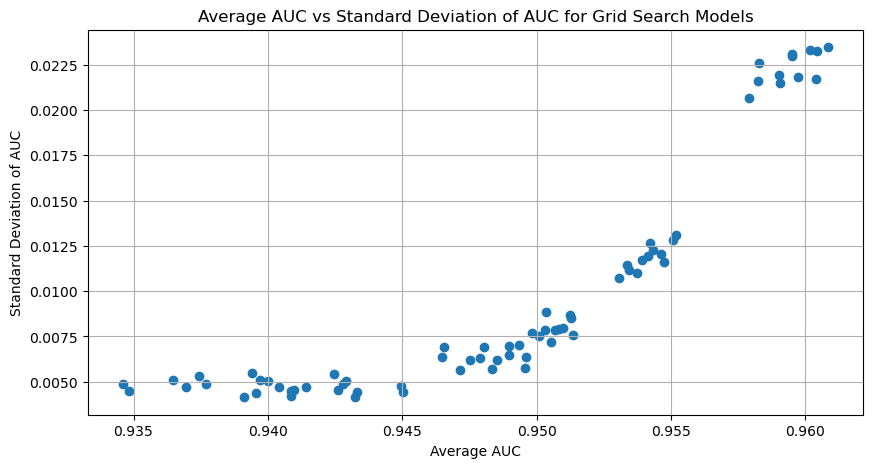

In [53]:
# Calculate average and standard deviation of AUCs
table['Average AUC'] = table[['AUC Train', 'AUC Test1', 'AUC Test2']].mean(axis=1)
table['Standard Deviation AUC'] = table[['AUC Train', 'AUC Test1', 'AUC Test2']].std(axis=1)

# Create scatter plot (Average AUC vs Standard Deviation of AUC)
plt.figure(figsize=(10, 5))
plt.scatter(table['Average AUC'], table['Standard Deviation AUC'])
plt.xlabel('Average AUC')
plt.ylabel('Standard Deviation of AUC')
plt.title('Average AUC vs Standard Deviation of AUC for Grid Search Models')
plt.grid(True)
plt.show()


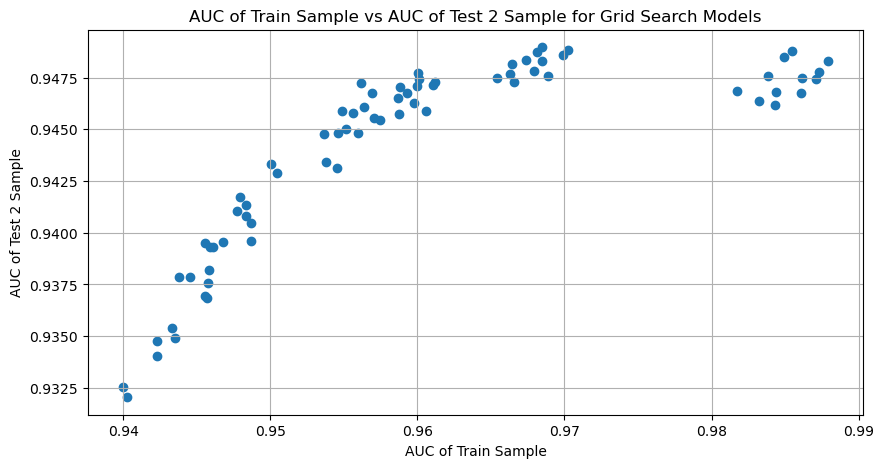

In [54]:
# Create scatter plot (AUC of train sample vs AUC of Test 2 sample)
plt.figure(figsize=(10, 5))
plt.scatter(table['AUC Train'], table['AUC Test2'])
plt.xlabel('AUC of Train Sample')
plt.ylabel('AUC of Test 2 Sample')
plt.title('AUC of Train Sample vs AUC of Test 2 Sample for Grid Search Models')
plt.grid(True)
plt.show()


In [55]:
pip install shap

In [56]:
import shap
shap.initjs()

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [57]:
explainer = shap.Explainer(best_model)
shap_values = explainer(X3_test2)

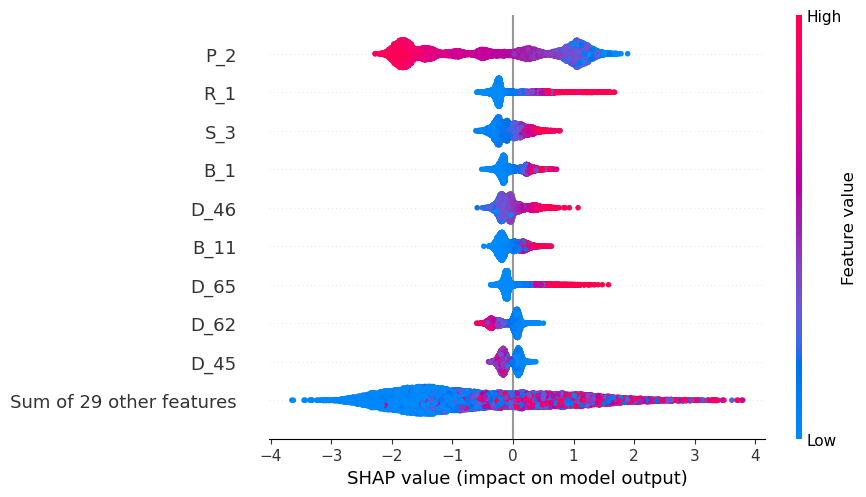

In [58]:
shap.plots.beeswarm(shap_values)

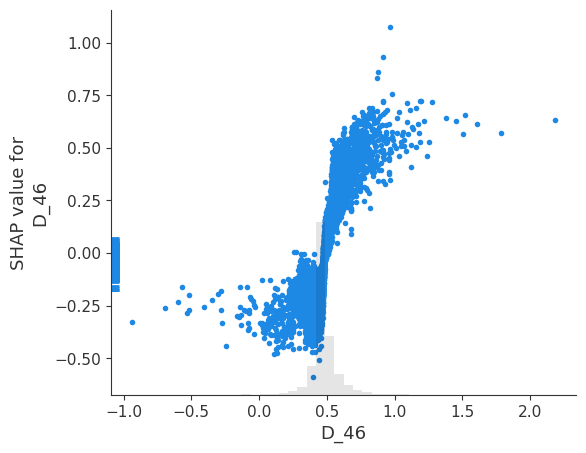

In [59]:
shap.plots.scatter(shap_values[:,"D_46"])

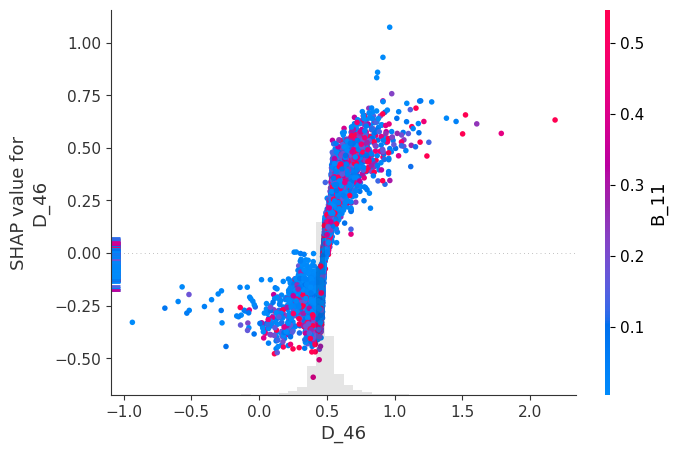

In [60]:
shap.plots.scatter(shap_values[:,"D_46"], color=shap_values[:,"B_11"])

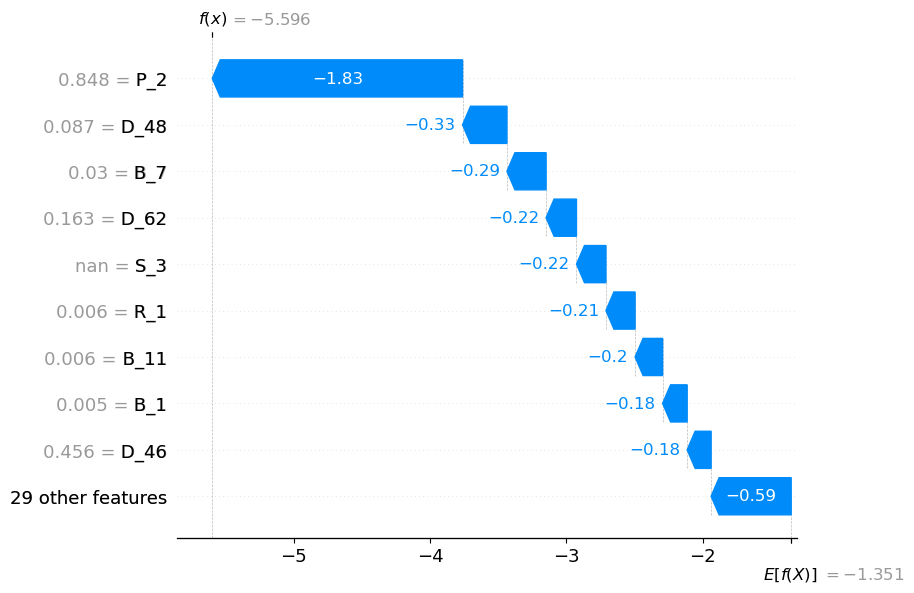

In [61]:
shap.plots.waterfall(shap_values[1100])

In [62]:
import shap

# Create a Tree explainer object
explainer = shap.Explainer(best_model)

# Compute SHAP values
shap_values = explainer.shap_values(X3_train)

# Compute mean absolute SHAP values for each feature
mean_abs_shap_values = np.mean(np.abs(shap_values), axis=0)

# Get feature names
feature_names = X3_train.columns

# Create a DataFrame of feature importances
feature_importances = pd.DataFrame({
    'feature': feature_names,
    'importance': mean_abs_shap_values
})

# Sort DataFrame by importance
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Get top 5 features
top_5_features = feature_importances['feature'].head(5).values

# Calculate summary statistics for top 5 features
summary_stats = X3_train[top_5_features].describe()

# Print the summary statistics
summary_stats.transpose()


,count,mean,std,min,25%,50%,75%,max
P_2,63898.0,0.647868,0.236974,-0.338276,0.467849,0.677623,0.855279,1.007375
R_1,64247.0,0.080350,0.159092,0.000001,0.004832,0.005842,0.081778,1.755336
S_3,56409.0,0.231147,0.170822,-0.205972,0.135535,0.174111,0.274577,2.730711
B_1,64247.0,0.127414,0.199905,-1.891373,0.016399,0.038736,0.140408,1.323597
D_46,53072.0,0.476720,0.113517,-2.603102,0.441405,0.461120,0.502113,3.170601


Model 1 (Neural Network): It has AUCs of 0.934, 0.933, and 0.933 on the training, test1, and test2 sets, respectively. These numbers are fairly close, suggesting that the model is not overfitting and hence has low variance. The performance (as measured by AUC) is quite good, suggesting that the model also has low bias.

Model 2 (XGBoost): It has AUCs of 0.969, 0.947, and 0.946 on the training, test1, and test2 sets, respectively. There is a bigger gap between the training and test AUCs, suggesting the model may have a slightly higher variance than Model 1. However, the difference is not substantial, and the performance on the test sets is still very good. This model appears to have a low bias and a slightly higher variance compared to Model 1.

Both models seem to have a good balance of bias and variance, given their performances on the test sets are relatively close to their performances on the training sets. But if you want to prioritize a model that likely has a lower variance (and thus may generalize slightly better to new data), Model 1 might be a slightly better choice. Conversely, if you want to prioritize the model with the lowest bias (and thus the highest performance on the training set), Model 2 might be the better choice.

In [63]:
# Remove the additional columns from X3_train
#X3_train = X3_train.drop(columns=['predicted_default', 'target'])

# Subsetting X3_test1 with the columns of X3_train
X3_test1 = X3_test1[X3_train.columns]

# Predict default probabilities on the test set
predicted_default = best_model.predict_proba(X3_test1)[:, 1]

# Add predicted default probabilities and actual target to the test dataframe
X3_test1['predicted_default'] = predicted_default
X3_test1 = X3_test1.assign(target = Y_test1.values)

# Define the function that calculates default rate and expected revenue
def calculate_metrics(df, threshold):
    accepted_customers = df[df["predicted_default"] < threshold].copy()
    
    # Calculate portfolio default rate
    portfolio_default_rate = accepted_customers['target'].mean()

    # Calculate portfolio expected revenue
    accepted_customers["Monthly_Revenue"] = accepted_customers["B_2"]*0.02 + accepted_customers["S_3"]*0.001
    portfolio_expected_revenue = (accepted_customers[accepted_customers["target"] == 0]["Monthly_Revenue"] * 12).sum()
    
    return portfolio_default_rate, portfolio_expected_revenue

# Test with different thresholds
for threshold in [0.1, 0.2, 0.3, 0.4, 0.5,0.6,0.7,0.8,0.9]:
    default_rate, expected_revenue = calculate_metrics(X3_test1, threshold)
    print(f"Threshold: {threshold}, Default Rate: {default_rate}, Expected Revenue: {expected_revenue}")


Threshold: 0.1, Default Rate: 0.017758186397984887, Expected Revenue: 1282.3721223343186
Threshold: 0.2, Default Rate: 0.029438928653890556, Expected Revenue: 1351.056325042944
Threshold: 0.3, Default Rate: 0.04319912948857454, Expected Revenue: 1387.701083772712
Threshold: 0.4, Default Rate: 0.05795301666149229, Expected Revenue: 1414.3900485977902
Threshold: 0.5, Default Rate: 0.0775963808025177, Expected Revenue: 1439.113352250105
Threshold: 0.6, Default Rate: 0.10208274960306342, Expected Revenue: 1457.4980312014184
Threshold: 0.7, Default Rate: 0.12850550230741925, Expected Revenue: 1473.8612003195517
Threshold: 0.8, Default Rate: 0.16236441604305055, Expected Revenue: 1485.5939100734804
Threshold: 0.9, Default Rate: 0.20190716368508158, Expected Revenue: 1495.9672599496982


In [64]:
# Remove the additional columns from X3_train
#X3_train = X3_train.drop(columns=['predicted_default', 'target'])

# Subsetting X3_test1 with the columns of X3_train
X3_test2 = X3_test2[X3_train.columns]

# Predict default probabilities on the test set
predicted_default = best_model.predict_proba(X3_test2)[:, 1]

# Add predicted default probabilities and actual target to the test dataframe
X3_test2['predicted_default'] = predicted_default
X3_test2 = X3_test2.assign(target = Y_test2.values)

# Define the function that calculates default rate and expected revenue
def calculate_metrics(df, threshold):
    accepted_customers = df[df["predicted_default"] < threshold].copy()
    
    # Calculate portfolio default rate
    portfolio_default_rate = accepted_customers['target'].mean()

    # Calculate portfolio expected revenue
    accepted_customers["Monthly_Revenue"] = accepted_customers["B_2"]*0.02 + accepted_customers["S_3"]*0.001
    portfolio_expected_revenue = (accepted_customers[accepted_customers["target"] == 0]["Monthly_Revenue"] * 12).sum()
    
    return portfolio_default_rate, portfolio_expected_revenue

# Test with different thresholds
for threshold in [0.1, 0.2, 0.3, 0.4, 0.5,0.6,0.7,0.8,0.9]:
    default_rate, expected_revenue = calculate_metrics(X3_test2, threshold)
    print(f"Threshold: {threshold}, Default Rate: {default_rate}, Expected Revenue: {expected_revenue}")


Threshold: 0.1, Default Rate: 0.013726230953280443, Expected Revenue: 1297.8426445539376
Threshold: 0.2, Default Rate: 0.025523635115028042, Expected Revenue: 1375.530693372171
Threshold: 0.3, Default Rate: 0.03855681206246634, Expected Revenue: 1417.6248865136329
Threshold: 0.4, Default Rate: 0.05467713965112721, Expected Revenue: 1449.1463596953718
Threshold: 0.5, Default Rate: 0.07512423268050278, Expected Revenue: 1467.9615918708737
Threshold: 0.6, Default Rate: 0.096, Expected Revenue: 1485.2100038773226
Threshold: 0.7, Default Rate: 0.12194257355547679, Expected Revenue: 1498.9557957806876
Threshold: 0.8, Default Rate: 0.15508290068665215, Expected Revenue: 1512.66401255961
Threshold: 0.9, Default Rate: 0.1957376533501101, Expected Revenue: 1520.866606003438


In [65]:
# Remove the additional columns from X3_train
#X3_train = X3_train.drop(columns=['predicted_default', 'target'])

# Subsetting X3_test1 with the columns of X3_train
#X3_test2 = X3_test2[X3_train.columns]

# Predict default probabilities on the test set
predicted_default = best_model.predict_proba(X3_train)[:, 1]

# Add predicted default probabilities and actual target to the test dataframe
X3_train['predicted_default'] = predicted_default
X3_train = X3_train.assign(target = Y_train.values)

# Define the function that calculates default rate and expected revenue
def calculate_metrics(df, threshold):
    accepted_customers = df[df["predicted_default"] < threshold].copy()
    
    # Calculate portfolio default rate
    portfolio_default_rate = accepted_customers['target'].mean()

    # Calculate portfolio expected revenue
    accepted_customers["Monthly_Revenue"] = accepted_customers["B_2"]*0.02 + accepted_customers["S_3"]*0.001
    portfolio_expected_revenue = (accepted_customers[accepted_customers["target"] == 0]["Monthly_Revenue"] * 12).sum()
    
    return portfolio_default_rate, portfolio_expected_revenue

# Test with different thresholds
for threshold in [0.1, 0.2, 0.3, 0.4, 0.5,0.6,0.7,0.8,0.9]:
    default_rate, expected_revenue = calculate_metrics(X3_test2, threshold)
    print(f"Threshold: {threshold}, Default Rate: {default_rate}, Expected Revenue: {expected_revenue}")


Threshold: 0.1, Default Rate: 0.013726230953280443, Expected Revenue: 1297.8426445539376
Threshold: 0.2, Default Rate: 0.025523635115028042, Expected Revenue: 1375.530693372171
Threshold: 0.3, Default Rate: 0.03855681206246634, Expected Revenue: 1417.6248865136329
Threshold: 0.4, Default Rate: 0.05467713965112721, Expected Revenue: 1449.1463596953718
Threshold: 0.5, Default Rate: 0.07512423268050278, Expected Revenue: 1467.9615918708737
Threshold: 0.6, Default Rate: 0.096, Expected Revenue: 1485.2100038773226
Threshold: 0.7, Default Rate: 0.12194257355547679, Expected Revenue: 1498.9557957806876
Threshold: 0.8, Default Rate: 0.15508290068665215, Expected Revenue: 1512.66401255961
Threshold: 0.9, Default Rate: 0.1957376533501101, Expected Revenue: 1520.866606003438



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [66]:
df["predicted_default"] = best_model.predict_proba(df[filtered_features])[:, 1]


# Now, you can perform the analysis for each period
for threshold in [0.1, 0.2, 0.3, 0.4, 0.5,0.6,0.7,0.8,0.9]:
    print(f"Threshold: {threshold}")
    default_rate, expected_revenue = calculate_metrics(df, threshold)
    print(f"Mar 2017 - Mar 2018, Default Rate: {default_rate}, Expected Revenue: {expected_revenue}")

Threshold: 0.1
Mar 2017 - Mar 2018, Default Rate: 0.026799094234033764, Expected Revenue: 99806.30136156062
Threshold: 0.2
Mar 2017 - Mar 2018, Default Rate: 0.046506269504861135, Expected Revenue: 105193.55860958023
Threshold: 0.3
Mar 2017 - Mar 2018, Default Rate: 0.06660279009794266, Expected Revenue: 107965.48801601607
Threshold: 0.4
Mar 2017 - Mar 2018, Default Rate: 0.08729033027763952, Expected Revenue: 109767.51655771912
Threshold: 0.5
Mar 2017 - Mar 2018, Default Rate: 0.10923056998084821, Expected Revenue: 111080.98025269281
Threshold: 0.6
Mar 2017 - Mar 2018, Default Rate: 0.13243584110934062, Expected Revenue: 112082.12985785403
Threshold: 0.7
Mar 2017 - Mar 2018, Default Rate: 0.15788283123110602, Expected Revenue: 112861.17139544214
Threshold: 0.8
Mar 2017 - Mar 2018, Default Rate: 0.18562458326832898, Expected Revenue: 113436.79143939941
Threshold: 0.9
Mar 2017 - Mar 2018, Default Rate: 0.21618271200715405, Expected Revenue: 113812.59711839398


In [67]:
# Ensure that X3_test2 has the same columns as the training data
X3_test2 = X3_test2[filtered_features]

# Generate predicted default probabilities
predicted_default_test2 = best_model.predict_proba(X3_test2)[:, 1]

# Add predicted probabilities to the testing dataframe
X3_test2['predicted_default'] = predicted_default_test2

# Divide df2 based on date
df_may17_jan18 = df[(df['S_2'] >= '2017-05-01') & (df['S_2'] <= '2018-01-31')]
df_mar17_apr17 = df[(df['S_2'] >= '2017-03-01') & (df['S_2'] <= '2017-04-30')]
df_feb18_mar18 = df[(df['S_2'] >= '2018-02-01') & (df['S_2'] <= '2018-03-31')]

# Add predicted default probabilities to each time period
df_may17_jan18["predicted_default"] = best_model.predict_proba(df_may17_jan18[filtered_features])[:, 1]
df_mar17_apr17["predicted_default"] = best_model.predict_proba(df_mar17_apr17[filtered_features])[:, 1]
df_feb18_mar18["predicted_default"] = best_model.predict_proba(df_feb18_mar18[filtered_features])[:, 1]

# Function to calculate the number of defaults based on a threshold
def calculate_num_defaults(df, threshold):
    # Classify customers as defaulted if their predicted default probability is above the threshold
    df['is_defaulted'] = df['predicted_default'].apply(lambda x: 1 if x > threshold else 0)
    # Calculate number of defaulted customers
    num_defaults = df['is_defaulted'].sum()
    return num_defaults

# Now, you can calculate the number of defaulted customers for each period and threshold
for threshold in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    print(f"Threshold: {threshold}")
    num_defaults_may17_jan18 = calculate_num_defaults(df_may17_jan18, threshold)
    print(f"May 2017 - Jan 2018, Number of defaulted customers: {num_defaults_may17_jan18}")

    num_defaults_mar17_apr17 = calculate_num_defaults(df_mar17_apr17, threshold)
    print(f"March 2017 - April 2017, Number of defaulted customers: {num_defaults_mar17_apr17}")

    num_defaults_feb18_mar18 = calculate_num_defaults(df_feb18_mar18, threshold)
    print(f"February 2018 - March 2018, Number of defaulted customers: {num_defaults_feb18_mar18}")



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Threshold: 0.1



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


May 2017 - Jan 2018, Number of defaulted customers: 307396
March 2017 - April 2017, Number of defaulted customers: 60098
February 2018 - March 2018, Number of defaulted customers: 76407
Threshold: 0.2
May 2017 - Jan 2018, Number of defaulted customers: 258746
March 2017 - April 2017, Number of defaulted customers: 49039
February 2018 - March 2018, Number of defaulted customers: 65951
Threshold: 0.3
May 2017 - Jan 2018, Number of defaulted customers: 223056
March 2017 - April 2017, Number of defaulted customers: 40789
February 2018 - March 2018, Number of defaulted customers: 58515
Threshold: 0.4
May 2017 - Jan 2018, Number of defaulted customers: 191809
March 2017 - April 2017, Number of defaulted customers: 33861
February 2018 - March 2018, Number of defaulted customers: 51720
Threshold: 0.5
May 2017 - Jan 2018, Number of defaulted customers: 161776
March 2017 - April 2017, Number of defaulted customers: 27628
February 2018 - March 2018, Number of defaulted customers: 45300
Threshold:

In [68]:
# Add the target variable back to df2
#X3_test2 = X3_test2[X3_train.columns]
# Ensure that X3_test2 has the same columns as the training data
X3_test2 = X3_test2[filtered_features]

# Generate predicted default probabilities
predicted_default_test2 = best_model.predict_proba(X3_test2)[:, 1]

# Add predicted probabilities to the testing dataframe
X3_test2['predicted_default'] = predicted_default_test2



# Divide df2 based on date
df_may17_jan18 = df[(df['S_2'] >= '2017-05-01') & (df['S_2'] <= '2018-01-31')]
df_mar17_apr17 = df[(df['S_2'] >= '2017-03-01') & (df['S_2'] <= '2017-04-30')]
df_feb18_mar18 = df[(df['S_2'] >= '2018-02-01') & (df['S_2'] <= '2018-03-31')]

df_may17_jan18["predicted_default"] = best_model.predict_proba(df_may17_jan18[filtered_features])[:, 1]
df_mar17_apr17["predicted_default"] = best_model.predict_proba(df_mar17_apr17[filtered_features])[:, 1]
df_feb18_mar18["predicted_default"] = best_model.predict_proba(df_feb18_mar18[filtered_features])[:, 1]


# Now, you can perform the analysis for each period
for threshold in [0.1, 0.2, 0.3, 0.4, 0.5,0.6,0.7,0.8,0.9]:
    print(f"Threshold: {threshold}")
    default_rate, expected_revenue = calculate_metrics(df_may17_jan18, threshold)
    print(f"May 2017 - Jan 2018, Default Rate: {default_rate}, Expected Revenue: {expected_revenue}")

    default_rate, expected_revenue = calculate_metrics(df_mar17_apr17, threshold)
    print(f"March 2017 - April 2017, Default Rate: {default_rate}, Expected Revenue: {expected_revenue}")

    default_rate, expected_revenue = calculate_metrics(df_feb18_mar18, threshold)
    print(f"February 2018 - March 2018, Default Rate: {default_rate}, Expected Revenue: {expected_revenue}")




A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Threshold: 0.1
May 2017 - Jan 2018, Default Rate: 0.027049339655402113, Expected Revenue: 68856.24625052433
March 2017 - April 2017, Default Rate: 0.03794860456468649, Expected Revenue: 14933.7832452603
February 2018 - March 2018, Default Rate: 0.015245053617278357, Expected Revenue: 16016.271865775992
Threshold: 0.2
May 2017 - Jan 2018, Default Rate: 0.04723237324709734, Expected Revenue: 72592.23009009528
March 2017 - April 2017, Default Rate: 0.062372243628009624, Expected Revenue: 15727.294304694233
February 2018 - March 2018, Default Rate: 0.0282751391848237, Expected Revenue: 16874.034214790747
Threshold: 0.3
May 2017 - Jan 2018, Default Rate: 0.06755722445486687, Expected Revenue: 74527.23161259295
March 2017 - April 2017, Default Rate: 0.0859004140995859, Expected Revenue: 16134.284017679802
February 2018 - March 2018, Default Rate: 0.043907678392609104, Expected Revenue: 17303.9723857433
Threshold: 0.4
May 2017 - Jan 2018, Default Rate: 0.08870807423088861, Expected Revenue: 7

In [69]:
# Add the target variable back to df2
#X3_test2 = X3_test2[X3_train.columns]
# Ensure that X3_test2 has the same columns as the training data
X3_test2 = X3_test2[filtered_features]

# Generate predicted default probabilities
predicted_default_test2 = best_model.predict_proba(X3_test2)[:, 1]

# Add predicted probabilities to the testing dataframe
X3_test2['predicted_default'] = predicted_default_test2



df["predicted_default"] = best_model.predict_proba(df[filtered_features])[:, 1]


# Now, you can perform the analysis for each period
for threshold in [0.1, 0.2, 0.3, 0.4, 0.5,0.6,0.7,0.8,0.9]:
    print(f"Threshold: {threshold}")
    default_rate, expected_revenue = calculate_metrics(df, threshold)
    print(f"Mar 2017 - Mar 2018, Default Rate: {default_rate}, Expected Revenue: {expected_revenue}")

Threshold: 0.1
Mar 2017 - Mar 2018, Default Rate: 0.026799094234033764, Expected Revenue: 99806.30136156062
Threshold: 0.2
Mar 2017 - Mar 2018, Default Rate: 0.046506269504861135, Expected Revenue: 105193.55860958023
Threshold: 0.3
Mar 2017 - Mar 2018, Default Rate: 0.06660279009794266, Expected Revenue: 107965.48801601607
Threshold: 0.4
Mar 2017 - Mar 2018, Default Rate: 0.08729033027763952, Expected Revenue: 109767.51655771912
Threshold: 0.5
Mar 2017 - Mar 2018, Default Rate: 0.10923056998084821, Expected Revenue: 111080.98025269281
Threshold: 0.6
Mar 2017 - Mar 2018, Default Rate: 0.13243584110934062, Expected Revenue: 112082.12985785403
Threshold: 0.7
Mar 2017 - Mar 2018, Default Rate: 0.15788283123110602, Expected Revenue: 112861.17139544214
Threshold: 0.8
Mar 2017 - Mar 2018, Default Rate: 0.18562458326832898, Expected Revenue: 113436.79143939941
Threshold: 0.9
Mar 2017 - Mar 2018, Default Rate: 0.21618271200715405, Expected Revenue: 113812.59711839398


In [70]:
# Ensure that X3_test2 has the same columns as the training data
X3_test2 = X3_test2[filtered_features]

# Generate predicted default probabilities
predicted_default_test2 = best_model.predict_proba(X3_test2)[:, 1]

# Add predicted probabilities to the testing dataframe
X3_test2['predicted_default'] = predicted_default_test2


# Add predicted default probabilities to each time period
df["predicted_default"] = best_model.predict_proba(df[filtered_features])[:, 1]



# Now, you can calculate the number of defaulted customers for each period and threshold
for threshold in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    print(f"Threshold: {threshold}")
    num_defaults_mar17_mar18 = calculate_num_defaults(df, threshold)
    print(f"May 2017 - Jan 2018, Number of defaulted customers: {num_defaults_mar17_mar18}")

    

Threshold: 0.1
May 2017 - Jan 2018, Number of defaulted customers: 443901
Threshold: 0.2
May 2017 - Jan 2018, Number of defaulted customers: 373736
Threshold: 0.3
May 2017 - Jan 2018, Number of defaulted customers: 322360
Threshold: 0.4
May 2017 - Jan 2018, Number of defaulted customers: 277390
Threshold: 0.5
May 2017 - Jan 2018, Number of defaulted customers: 234704
Threshold: 0.6
May 2017 - Jan 2018, Number of defaulted customers: 192213
Threshold: 0.7
May 2017 - Jan 2018, Number of defaulted customers: 147907
Threshold: 0.8
May 2017 - Jan 2018, Number of defaulted customers: 100864
Threshold: 0.9
May 2017 - Jan 2018, Number of defaulted customers: 50462


The output shows the Default Rate and Expected Revenue for three different periods: May 2017 - Jan 2018, March 2017 - April 2017, and February 2018 - March 2018. For each period, five different thresholds were evaluated: 0.1, 0.2, 0.3, 0.4, and 0.5.
Here's a brief interpretation of the results:
•	As the threshold increases, both the Default Rate and the Expected Revenue increase. This is because a higher threshold means the bank is more lenient and accepts more loans, including risky ones, leading to a higher Default Rate. However, by accepting more loans, the bank also increases its Expected Revenue.
•	For the period from May 2017 to Jan 2018, the Default Rate ranges from 0.030 (at a threshold of 0.1) to 0.119 (at a threshold of 0.5). The Expected Revenue for this period increases from about 69,354 to 76,810.
•	For the period from March 2017 to April 2017, the Default Rate ranges from 0.042 (at a threshold of 0.1) to 0.137 (at a threshold of 0.5). The Expected Revenue for this period increases from about 15,030 to 16,588.
•	For the period from February 2018 to March 2018, the Default Rate ranges from 0.017 (at a threshold of 0.1) to 0.089 (at a threshold of 0.5). The Expected Revenue for this period increases from about 16,117 to 17,857.



In [71]:
# Determine the number of customers in each period
num_customers_may17_jan18 = df_may17_jan18.shape[0]
num_customers_mar17_apr17 = df_mar17_apr17.shape[0]
num_customers_feb18_mar18 = df_feb18_mar18.shape[0]

# Define the thresholds
thresholds = [0.1,0.2,0.3,0.4,0.5]

for threshold in thresholds:
    print(f"Threshold: {threshold}")
    
    # Calculate default rate for each period
    default_rate_may17_jan18, _ = calculate_metrics(df_may17_jan18, threshold)
    default_rate_mar17_apr17, _ = calculate_metrics(df_mar17_apr17, threshold)
    default_rate_feb18_mar18, _ = calculate_metrics(df_feb18_mar18, threshold)
    
    # Calculate number of defaulted customers
    num_defaulted_may17_jan18 = int(default_rate_may17_jan18 * num_customers_may17_jan18)
    num_defaulted_mar17_apr17 = int(default_rate_mar17_apr17 * num_customers_mar17_apr17)
    num_defaulted_feb18_mar18 = int(default_rate_feb18_mar18 * num_customers_feb18_mar18)
    
    print(f"May 2017 - Jan 2018, Number of Defaulted Customers: {num_defaulted_may17_jan18}")
    print(f"March 2017 - April 2017, Number of Defaulted Customers: {num_defaulted_mar17_apr17}")
    print(f"February 2018 - March 2018, Number of Defaulted Customers: {num_defaulted_feb18_mar18}")
    print()


Threshold: 0.1
May 2017 - Jan 2018, Number of Defaulted Customers: 20699
March 2017 - April 2017, Number of Defaulted Customers: 6056
February 2018 - March 2018, Number of Defaulted Customers: 2779

Threshold: 0.2
May 2017 - Jan 2018, Number of Defaulted Customers: 36145
March 2017 - April 2017, Number of Defaulted Customers: 9954
February 2018 - March 2018, Number of Defaulted Customers: 5155

Threshold: 0.3
May 2017 - Jan 2018, Number of Defaulted Customers: 51699
March 2017 - April 2017, Number of Defaulted Customers: 13709
February 2018 - March 2018, Number of Defaulted Customers: 8006

Threshold: 0.4
May 2017 - Jan 2018, Number of Defaulted Customers: 67885
March 2017 - April 2017, Number of Defaulted Customers: 17182
February 2018 - March 2018, Number of Defaulted Customers: 11206

Threshold: 0.5
May 2017 - Jan 2018, Number of Defaulted Customers: 85261
March 2017 - April 2017, Number of Defaulted Customers: 20555
February 2018 - March 2018, Number of Defaulted Customers: 14729



In [72]:
num_customers_may17_jan18 = df_may17_jan18.shape[0]
num_customers_mar17_apr17 = df_mar17_apr17.shape[0]
num_customers_feb18_mar18 = df_feb18_mar18.shape[0]

In [73]:
num_customers_may17_jan18

765263

In [74]:
num_customers_mar17_apr17

159601

In [75]:
num_customers_feb18_mar18

182343

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1107207 entries, 0 to 1107206
Columns: 214 entries, customer_ID to is_defaulted
dtypes: float32(1), float64(163), int64(3), object(2), uint8(45)
memory usage: 1.4+ GB
